In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

dataset = pd.read_csv('./dataset/Twitter_Data.csv')

#drop nan values
dataset = dataset.dropna()

#drop duplicates

dataset = dataset.drop_duplicates()

#transform the sentiment to text
dataset['category'] = dataset['category'].map({-1:'Negative', 1:'Positive', 0:'Neutral'})

#get dummy variables

dataset = pd.get_dummies(dataset, columns=['category'])

print(dataset.head())

x = dataset["clean_text"]

y = dataset.drop(['clean_text'], axis=1)

x = x.to_numpy(dtype="<U43")

y = y.to_numpy()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

                                          clean_text  category_Negative  \
0  when modi promised “minimum government maximum...                  1   
1  talk all the nonsense and continue all the dra...                  0   
2  what did just say vote for modi  welcome bjp t...                  0   
3  asking his supporters prefix chowkidar their n...                  0   
4  answer who among these the most powerful world...                  0   

   category_Neutral  category_Positive  
0                 0                  0  
1                 1                  0  
2                 0                  1  
3                 0                  1  
4                 0                  1  


In [6]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(x_train)


vocab = np.array(encoder.get_vocabulary())
vocab[:20]


model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [11]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,epochs=20)

In [76]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

1019/1019 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.3385
Test Loss: nan
Test Accuracy: 0.3385078012943268


In [77]:
#save the model

model.save('model1', save_format="tf")

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [9]:
model2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

tf.keras.optimizers.Adam(learning_rate=0.00146, name='Adam')

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                optimizer='Adam',
                metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

test_loss2, test_acc2 = model2.evaluate(x_test, y_test)

print('Test Loss:', test_loss2)
print('Test Accuracy:', test_acc2)

Epoch 1/20
4075/4075 [==============================] - 42s 10ms/step - loss: 0.8498 - accuracy: 0.5832 - val_loss: 0.8201 - val_accuracy: 0.5914
Epoch 2/20
4075/4075 [==============================] - 40s 10ms/step - loss: 0.8145 - accuracy: 0.6017 - val_loss: 0.8175 - val_accuracy: 0.5973
Epoch 3/20
4075/4075 [==============================] - 40s 10ms/step - loss: 0.8056 - accuracy: 0.6069 - val_loss: 0.8094 - val_accuracy: 0.6016
Epoch 4/20
4075/4075 [==============================] - 41s 10ms/step - loss: 0.7982 - accuracy: 0.6111 - val_loss: 0.8100 - val_accuracy: 0.6031
Epoch 5/20
4075/4075 [==============================] - 40s 10ms/step - loss: 0.7922 - accuracy: 0.6150 - val_loss: 0.8074 - val_accuracy: 0.6053
Epoch 6/20
4075/4075 [==============================] - 41s 10ms/step - loss: 0.7861 - accuracy: 0.6179 - val_loss: 0.8083 - val_accuracy: 0.6037
Epoch 7/20
4075/4075 [==============================] - 42s 10ms/step - loss: 0.7808 - accuracy: 0.6210 - val_loss: 0.8073 -

In [10]:
#save the model

model2.save('model2', save_format="tf")

INFO:tensorflow:Assets written to: model2\assets


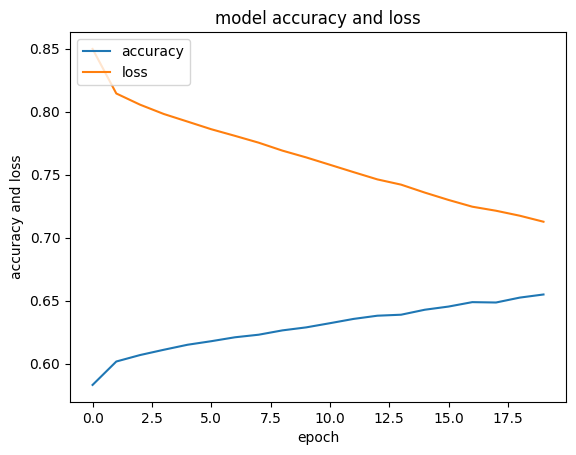

In [11]:
#plot model 2

import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [17]:
df = pd.read_csv('./dataset/Twitter_Data.csv')


def transform_category(category):
    if category == 1.0:
        return "Good"
    if category == 0.0:
        return "Neutral"
    if category == -1.0:
        return "Bad"

df['category'] = df['category'].apply(lambda category: transform_category(category))

category = pd.get_dummies(df.category)
df_category = pd.concat([df, category], axis=1)
df_category = df_category.drop(columns='category')

text = df_category['clean_text'].astype(str)
label = df_category[['Bad', 'Good', 'Neutral']].values

category_train, category_test, label_train, label_test = train_test_split(text, label, test_size = 0.3)

In [18]:
tokenizer2 = tf.keras.preprocessing.text.Tokenizer(num_words=1920, oov_token="x")
tokenizer2.fit_on_texts(category_train)
tokenizer2.fit_on_texts(category_test)

sekuens_train = tokenizer2.texts_to_sequences(category_train)
sekuens_test = tokenizer2.texts_to_sequences(category_test)

padded_train = tf.keras.preprocessing.sequence.pad_sequences(sekuens_train)
padded_test = tf.keras.preprocessing.sequence.pad_sequences(sekuens_test)

In [19]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1920, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [29]:
model3.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [30]:
history3 = model3.fit(padded_train, label_train, epochs=10)

Epoch 1/10
3566/3566 [==============================] - 50s 14ms/step - loss: 0.3068 - accuracy: 0.9027
Epoch 2/10
3566/3566 [==============================] - 48s 13ms/step - loss: 0.2964 - accuracy: 0.9048
Epoch 3/10
3566/3566 [==============================] - 48s 13ms/step - loss: 0.2876 - accuracy: 0.9067
Epoch 4/10
3566/3566 [==============================] - 48s 13ms/step - loss: 0.2786 - accuracy: 0.9085
Epoch 5/10
3566/3566 [==============================] - 48s 13ms/step - loss: 0.2705 - accuracy: 0.9099
Epoch 6/10
3566/3566 [==============================] - 50s 14ms/step - loss: 0.2616 - accuracy: 0.9117
Epoch 7/10
3566/3566 [==============================] - 49s 14ms/step - loss: 0.2530 - accuracy: 0.9130
Epoch 8/10
3566/3566 [==============================] - 48s 13ms/step - loss: 0.2448 - accuracy: 0.9152
Epoch 9/10
3566/3566 [==============================] - 48s 14ms/step - loss: 0.2364 - accuracy: 0.9173
Epoch 10/10
3566/3566 [==============================] - 49s 14m

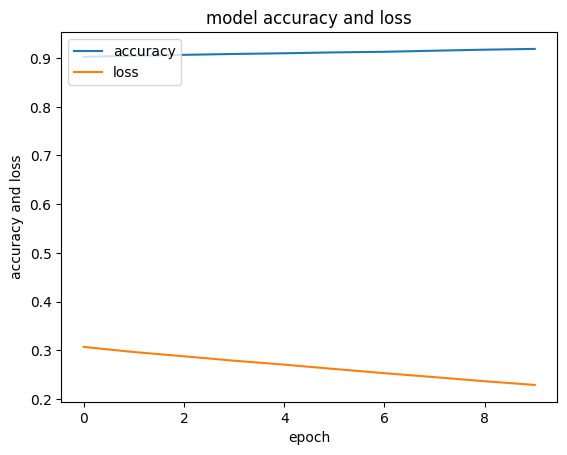

1528/1528 [==============================] - 8s 5ms/step - loss: 0.3875 - accuracy: 0.8938
Test Loss: 0.38745957612991333
Test Accuracy: 0.8938111066818237


In [37]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

test_loss3, test_acc3 = model3.evaluate(padded_test, label_test)

print('Test Loss:', test_loss3)
print('Test Accuracy:', test_acc3)

In [38]:
model3.save('model3', save_format="tf")

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


In [39]:
#save the tokenizer

import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer2, handle, protocol=pickle.HIGHEST_PROTOCOL)
